In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot") # gives a grid background
from sklearn.cluster import KMeans

In [3]:
# import dataset

data = pd.read_csv('MOCK_DATA1.csv')
data.head()

English  Math  Science  Social_Studies  Language  BDT  ICT  Catering  \
0       42    92       46              88        97   66   87        58   
1       93    59       55              59        59   99   76       100   
2       93    91       85              77        73   69   49        65   
3       92    63       75              78        43   42   90        54   
4       69    94       43              63        63   44   81        72   

   Sewing  Drama  Computer_games  Drawing  Sports  
0      58   True            True     True    True  
1      70   True            True     True   False  
2      95   True           False    False   False  
3      99   True            True    False    True  
4      84   True            True     True   False

In [4]:
#Changing bool to integers, else the string nature of the boolean will give an error when we try to fit
data['Drawing'] = data.Drawing.astype(int)
data['Drama'] = data.Drama.astype(int)
data['Computer_games'] = data.Computer_games.astype(int)
data['Sports'] = data.Sports.astype(int)
data.dtypes

English           int64
Math              int64
Science           int64
Social_Studies    int64
Language          int64
BDT               int64
ICT               int64
Catering          int64
Sewing            int64
Drama             int32
Computer_games    int32
Drawing           int32
Sports            int32
dtype: object

In [5]:
x = np.array(list(zip(data['English'],data['Math'],data['Science'],data['Social_Studies'],data['Language'],data['BDT'],data['ICT'],data['Catering'],data['Sewing'],data['Drama'],data['Computer_games'],data['Drawing'],data['Sports'])))

In [6]:
x

array([[42, 92, 46, ...,  1,  1,  1],
       [93, 59, 55, ...,  1,  1,  0],
       [93, 91, 85, ...,  0,  0,  0],
       ...,
       [69, 77, 66, ...,  0,  0,  0],
       [97, 77, 72, ...,  1,  0,  0],
       [97, 74, 74, ...,  1,  1,  1]])

In [7]:
kmeans = KMeans(n_clusters = 6, random_state = 0)
km = kmeans.fit(x)
centroids = km.cluster_centers_
labels = km.labels_

In [8]:
print(centroids)

[[83.02013423 61.73825503 83.86577181 75.18791946 63.45637584 56.91946309
  60.63087248 78.80536913 70.58389262  0.4966443   0.55033557  0.44295302
   0.39597315]
 [63.93298969 54.85051546 56.1185567  82.03608247 73.54123711 67.25257732
  73.91752577 64.76804124 71.82989691  0.48969072  0.43814433  0.4742268
   0.49484536]
 [56.39010989 69.57692308 75.30769231 59.71978022 68.58791209 71.73076923
  57.51648352 58.74725275 76.06043956  0.47802198  0.52747253  0.45604396
   0.46153846]
 [73.93820225 68.10674157 72.02808989 55.92134831 77.08988764 77.2247191
  85.71348315 72.30898876 61.10674157  0.4494382   0.50561798  0.45505618
   0.45505618]
 [84.69281046 82.9869281  58.04575163 70.4248366  73.45098039 73.86928105
  59.71895425 73.24836601 74.85620915  0.54901961  0.50326797  0.47058824
   0.52287582]
 [59.94444444 84.82638889 74.36805556 84.51388889 62.39583333 69.47222222
  77.70833333 77.52777778 71.04861111  0.48611111  0.41666667  0.46527778
   0.41666667]]


In [9]:
print(labels)

[1 3 4 0 4 5 2 0 1 4 4 4 5 1 4 0 2 0 0 1 0 2 5 0 3 2 3 1 0 2 1 2 4 5 5 4 3
 3 5 1 4 4 2 4 3 5 2 2 1 5 4 1 4 2 5 2 0 1 3 4 2 0 2 1 4 3 0 4 1 4 2 1 1 1
 5 0 3 5 3 4 2 1 3 0 2 1 1 2 4 0 0 0 0 3 0 3 2 2 5 2 0 5 4 2 5 3 0 2 2 3 2
 4 0 2 0 2 4 5 0 5 1 0 1 3 3 3 1 0 2 5 4 0 2 3 0 5 4 1 3 0 5 0 5 0 3 1 4 3
 2 5 1 5 3 4 3 3 2 1 5 3 2 4 2 1 4 2 3 5 3 5 1 0 3 2 5 5 2 1 1 1 3 4 3 1 4
 3 5 5 0 3 1 1 2 0 4 2 1 4 4 1 0 3 2 3 3 1 5 3 1 1 0 4 0 4 2 5 5 3 3 2 4 2
 0 3 3 0 3 1 4 4 3 4 0 1 3 3 2 4 2 2 2 3 3 2 5 5 5 0 5 2 1 3 2 5 3 4 0 1 3
 2 5 4 0 1 2 2 3 4 1 2 4 0 0 1 4 2 5 1 1 4 2 1 5 4 1 5 1 2 5 0 1 4 5 1 4 0
 1 0 3 0 3 5 5 4 1 3 0 0 1 5 4 1 5 2 3 4 1 4 2 1 4 3 1 4 2 1 4 3 0 2 4 3 2
 1 0 1 0 2 1 3 2 0 2 3 1 4 1 2 5 4 4 0 0 4 1 2 5 4 3 1 3 3 2 5 2 1 2 4 0 4
 1 3 1 5 2 5 0 5 4 1 0 1 0 4 1 5 3 5 5 1 4 3 5 1 1 5 4 2 4 3 2 3 4 5 4 5 5
 0 2 3 0 4 1 4 5 4 4 0 3 1 2 1 3 1 4 5 3 4 2 4 5 1 3 2 3 5 1 3 3 5 0 4 1 0
 3 1 2 4 1 1 1 5 1 3 3 1 2 1 4 5 4 0 5 2 1 5 1 5 2 3 5 1 0 1 5 0 1 5 1 1 0
 2 3 5 0 1 3 4 3 4 2 4 5 

cordinate: [42 92 46 88 97 66 87 58 58  1  1  1  1] label: 1
cordinate: [ 93  59  55  59  59  99  76 100  70   1   1   1   0] label: 3
cordinate: [93 91 85 77 73 69 49 65 95  1  0  0  0] label: 4
cordinate: [92 63 75 78 43 42 90 54 99  1  1  0  1] label: 0
cordinate: [69 94 43 63 63 44 81 72 84  1  1  1  0] label: 4
cordinate: [63 89 80 97 40 49 62 52 84  0  1  1  1] label: 5
cordinate: [70 59 62 44 60 65 44 47 69  1  0  1  1] label: 2
cordinate: [85 59 70 73 44 64 47 76 44  0  1  1  1] label: 0
cordinate: [64 43 62 79 46 90 84 42 98  0  1  0  0] label: 1
cordinate: [64 79 41 65 82 40 57 89 44  1  0  1  0] label: 4
cordinate: [ 62 100  40  55  86  69  75  58  74   0   0   1   1] label: 4
cordinate: [79 79 41 59 65 85 65 43 41  1  0  1  1] label: 4
cordinate: [58 76 77 85 71 56 72 54 53  0  1  0  1] label: 5
cordinate: [47 54 44 66 95 79 99 41 44  1  1  0  1] label: 1
cordinate: [92 86 53 51 48 99 57 73 65  1  1  0  1] label: 4
cordinate: [75 69 61 98 69 55 64 99 73  1  1  0  0] label: 

cordinate: [78 97 66 94 72 67 94 51 69  1  1  1  0] label: 5
cordinate: [80 66 94 90 56 50 40 69 87  1  0  1  1] label: 0
cordinate: [51 92 64 99 82 40 57 63 54  1  0  1  1] label: 5
cordinate: [77 60 71 56 89 52 72 91 86  0  1  1  0] label: 0
cordinate: [48 83 59 57 84 99 92 64 71  0  1  1  0] label: 3
cordinate: [51 46 60 86 71 76 87 95 99  1  0  0  1] label: 1
cordinate: [89 98 64 62 64 54 76 72 97  0  1  1  1] label: 4
cordinate: [44 60 62 47 92 64 97 92 65  0  0  0  1] label: 3
cordinate: [45 72 59 50 66 69 52 80 70  1  1  1  0] label: 2
cordinate: [40 55 80 90 68 69 88 83 83  0  0  0  1] label: 5
cordinate: [55 68 42 66 90 61 88 43 45  0  0  1  1] label: 1
cordinate: [53 71 88 66 43 93 74 94 79  1  1  0  1] label: 5
cordinate: [59 47 74 52 84 92 97 76 84  1  1  1  1] label: 3
cordinate: [67 86 57 52 91 56 60 83 51  1  1  0  1] label: 4
cordinate: [89 75 88 54 90 79 53 54 42  0  1  0  1] label: 3
cordinate: [86 61 68 59 92 70 54 47 49  1  0  0  0] label: 3
cordinate: [73 80 89 84 

cordinate: [70 60 48 97 46 74 86 56 87  1  0  1  0] label: 1
cordinate: [ 98  87  75  90  42  69  97 100  81   0   1   1   0] label: 5
cordinate: [56 68 87 52 74 48 40 44 97  0  1  0  1] label: 2
cordinate: [40 66 65 58 92 58 72 72 48  0  0  1  1] label: 3
cordinate: [95 77 42 75 56 53 82 75 82  1  1  0  1] label: 4
cordinate: [44 51 62 96 85 81 99 66 81  1  1  0  1] label: 1
cordinate: [84 97 64 43 97 81 74 75 98  1  1  1  1] label: 4
cordinate: [ 45  69  81  48  44 100  85  65  82   0   1   0   1] label: 2
cordinate: [59 44 77 86 83 74 53 71 55  1  1  0  0] label: 1
cordinate: [85 78 46 67 86 57 71 79 67  0  0  1  1] label: 4
cordinate: [81 98 69 72 81 70 99 65 64  0  0  1  1] label: 3
cordinate: [98 41 86 99 99 81 88 71 76  1  1  0  1] label: 1
cordinate: [66 89 48 58 63 79 75 64 64  0  1  0  1] label: 4
cordinate: [45 81 90 91 94 97 69 54 94  1  0  0  1] label: 2
cordinate: [80 54 54 80 70 82 73 42 83  1  0  1  0] label: 1
cordinate: [85 85 71 46 62 61 48 85 42  0  0  1  1] label: 

cordinate: [74 87 55 52 44 99 53 74 40  1  1  1  1] label: 4
cordinate: [44 71 51 87 51 69 51 61 84  1  1  1  1] label: 1
cordinate: [72 55 99 70 91 77 98 99 42  1  0  1  1] label: 3
cordinate: [52 62 63 79 89 59 51 52 51  1  0  1  1] label: 1
cordinate: [96 78 89 55 83 80 83 77 90  0  1  1  0] label: 3
cordinate: [92 51 59 42 51 43 73 91 50  1  1  1  1] label: 0
cordinate: [43 75 64 56 74 73 93 73 76  1  1  1  0] label: 3
cordinate: [98 47 62 69 44 45 83 49 40  0  0  0  1] label: 0
cordinate: [70 53 58 48 54 57 40 65 77  0  0  1  1] label: 2
cordinate: [89 81 71 56 80 82 44 82 53  0  1  1  0] label: 4
cordinate: [72 82 96 81 43 52 85 73 92  1  0  1  1] label: 5
cordinate: [57 92 65 72 75 95 41 58 76  0  0  1  1] label: 2
cordinate: [40 52 78 49 44 46 40 48 73  0  1  0  1] label: 2
cordinate: [81 53 51 84 86 90 74 75 90  0  1  1  1] label: 1
cordinate: [67 77 54 52 95 98 90 82 49  1  0  0  1] label: 3
cordinate: [ 86  48  84  75  52  98  74  47 100   0   1   0   1] label: 2
cordinate: 

cordinate: [89 83 70 98 48 40 59 74 42  0  0  1  1] label: 0
cordinate: [87 41 55 78 84 57 71 79 62  0  0  0  0] label: 1
cordinate: [62 50 58 54 60 74 90 53 79  1  0  0  1] label: 1
cordinate: [43 88 94 63 40 71 56 61 81  1  1  0  0] label: 2
cordinate: [74 86 70 53 41 80 87 92 47  0  0  0  0] label: 3
cordinate: [78 45 64 52 91 93 60 59 51  0  1  0  0] label: 3
cordinate: [41 82 58 61 80 85 80 80 70  0  0  0  1] label: 3
cordinate: [76 74 71 52 52 85 70 56 92  0  0  0  1] label: 2
cordinate: [44 85 60 75 51 97 86 86 55  0  0  0  1] label: 5
cordinate: [54 48 57 77 72 85 47 48 81  1  0  0  1] label: 2
cordinate: [76 65 73 55 80 77 73 80 90  1  1  0  1] label: 3
cordinate: [51 99 85 44 64 69 43 82 54  1  1  0  1] label: 2
cordinate: [ 84  46  96  49  60  66  75 100  53   0   1   0   1] label: 0
cordinate: [64 51 72 65 63 49 70 71 46  1  0  0  0] label: 0
cordinate: [58 70 65 51 60 69 53 69 91  1  0  1  1] label: 2
cordinate: [49 54 70 80 79 79 53 65 76  0  1  0  0] label: 2
cordinate: 

cordinate: [53 88 43 54 93 63 95 49 40  1  1  1  1] label: 3
cordinate: [73 81 41 76 67 66 75 84 57  1  1  0  1] label: 4
cordinate: [88 59 69 99 95 79 82 98 77  0  1  1  0] label: 1
cordinate: [69 93 70 79 89 87 45 93 40  0  0  1  1] label: 4
cordinate: [84 87 71 89 85 77 48 79 84  1  0  1  0] label: 4
cordinate: [99 96 73 61 70 77 51 81 90  1  1  0  0] label: 4
cordinate: [78 79 72 93 53 55 78 86 82  1  0  0  0] label: 5
cordinate: [91 89 42 78 93 48 65 65 64  0  0  1  1] label: 4
cordinate: [74 82 76 84 64 67 92 75 86  0  1  0  0] label: 5
cordinate: [72 72 98 85 90 43 65 77 95  1  0  0  1] label: 0
cordinate: [88 57 95 49 57 73 87 91 81  1  0  1  1] label: 3
cordinate: [83 83 90 77 56 77 91 63 91  0  0  0  0] label: 5
cordinate: [60 57 87 55 94 62 99 74 76  0  1  1  1] label: 3
cordinate: [66 82 71 66 54 86 68 55 91  0  0  0  1] label: 2
cordinate: [53 96 61 85 42 87 79 93 83  0  1  1  1] label: 5
cordinate: [99 61 75 63 40 93 95 74 74  0  1  1  0] label: 3
cordinate: [50 55 54 43 

cordinate: [81 50 72 65 50 47 47 76 69  1  1  1  0] label: 0
cordinate: [50 53 51 94 61 96 91 93 99  1  1  0  1] label: 1
cordinate: [65 58 43 93 54 97 70 69 76  0  0  0  0] label: 1
cordinate: [48 59 42 78 90 92 75 59 69  1  1  0  0] label: 1
cordinate: [45 62 68 92 85 91 88 78 89  1  1  0  0] label: 1
cordinate: [60 85 93 92 63 80 85 78 46  1  0  0  0] label: 5
cordinate: [50 67 87 98 53 43 64 80 84  0  0  0  1] label: 5
cordinate: [69 77 66 68 82 88 59 41 81  1  0  0  0] label: 2
cordinate: [97 77 72 52 91 57 55 51 69  0  1  0  0] label: 4
cordinate: [ 97  74  74  49  82  89  48 100  85   0   1   1   1] label: 4


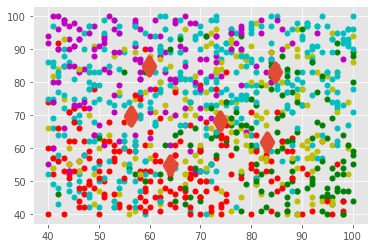

In [10]:
colors = ["g.", "r.", "c.", "y.","c.", "m."] # green red cyan yellow
for i in range(len(x)):
    print("cordinate:", x[i], "label:",labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:,0], centroids[:,1], marker = "d", s=150, linewidth = 5, zorder = 10)
plt.show()

In [11]:
r_data = list(zip(data['English'],data['Math'],data['Science'],data['Social_Studies'],data['Language'],data['BDT'],data['ICT'],data['Catering'],data['Sewing'],data['Drama'],data['Computer_games'],data['Drawing'],data['Sports'],labels))

In [12]:
r_data

[(42, 92, 46, 88, 97, 66, 87, 58, 58, 1, 1, 1, 1, 1),
 (93, 59, 55, 59, 59, 99, 76, 100, 70, 1, 1, 1, 0, 3),
 (93, 91, 85, 77, 73, 69, 49, 65, 95, 1, 0, 0, 0, 4),
 (92, 63, 75, 78, 43, 42, 90, 54, 99, 1, 1, 0, 1, 0),
 (69, 94, 43, 63, 63, 44, 81, 72, 84, 1, 1, 1, 0, 4),
 (63, 89, 80, 97, 40, 49, 62, 52, 84, 0, 1, 1, 1, 5),
 (70, 59, 62, 44, 60, 65, 44, 47, 69, 1, 0, 1, 1, 2),
 (85, 59, 70, 73, 44, 64, 47, 76, 44, 0, 1, 1, 1, 0),
 (64, 43, 62, 79, 46, 90, 84, 42, 98, 0, 1, 0, 0, 1),
 (64, 79, 41, 65, 82, 40, 57, 89, 44, 1, 0, 1, 0, 4),
 (62, 100, 40, 55, 86, 69, 75, 58, 74, 0, 0, 1, 1, 4),
 (79, 79, 41, 59, 65, 85, 65, 43, 41, 1, 0, 1, 1, 4),
 (58, 76, 77, 85, 71, 56, 72, 54, 53, 0, 1, 0, 1, 5),
 (47, 54, 44, 66, 95, 79, 99, 41, 44, 1, 1, 0, 1, 1),
 (92, 86, 53, 51, 48, 99, 57, 73, 65, 1, 1, 0, 1, 4),
 (75, 69, 61, 98, 69, 55, 64, 99, 73, 1, 1, 0, 0, 0),
 (71, 66, 72, 50, 54, 41, 69, 44, 46, 0, 0, 1, 0, 2),
 (94, 45, 65, 60, 58, 62, 69, 76, 87, 1, 0, 1, 0, 0),
 (72, 63, 89, 41, 74, 63, 

In [13]:
col_names = ['English','Math','Science','Social Studies','Language','BDT','ICT','Catering','Sewing','Drama','Computer_games','Drawing','Sports', 'Labels']
d1 = pd.DataFrame(r_data, columns = col_names)

In [14]:
d1

English  Math  Science  Social Studies  Language  BDT  ICT  Catering  \
0         42    92       46              88        97   66   87        58   
1         93    59       55              59        59   99   76       100   
2         93    91       85              77        73   69   49        65   
3         92    63       75              78        43   42   90        54   
4         69    94       43              63        63   44   81        72   
5         63    89       80              97        40   49   62        52   
6         70    59       62              44        60   65   44        47   
7         85    59       70              73        44   64   47        76   
8         64    43       62              79        46   90   84        42   
9         64    79       41              65        82   40   57        89   
10        62   100       40              55        86   69   75        58   
11        79    79       41              59        65   85   65        43   
12        58    76       77              85        71   56   72        54   
13        47    54       44              66        95   79   99        41   
14        92    86       53              51        48   99   57        73   
15        75    69       61              98        69   55   64        99   
16        71    66       72              50        54   41   69        44   
17        94    45       65              60        58   62   69        76   
18        72    63       89              41        74   63   59        91   
19        67    45       68              86        83   70   85        97   
20       100    58       96              49        63   83   53        99   
21        43    90       77              58        48   40   69        58   
22        65    99       66              91        76   44   74        61   
23       100    55       59              51        41   55   57        68   
24        72    40       74              60        89   94   73        47   
25        66    94       61              50        80   52   80        44   
26        61    71       74              44        64   70   84        58   
27        54    43       58              73        96   42   66        93   
28        85    65       88              67        46   55   72        77   
29        46    53       80              52        71   58   48        81   
..       ...   ...      ...             ...       ...  ...  ...       ...   
970       54    77       89              60        99   76   98        78   
971       50    40       41              98        40   89   92        71   
972       41    60       98              85        50   74   84       100   
973       96    43       69              83        82   91   94        52   
974       58    52       78              42        57   63   82        93   
975       81    61       42              82        87   51   44        66   
976       72    41       61              90        92   99   75        94   
977       62    89       65              40        60   83   64        76   
978       64    90       97              64        42   42   62        96   
979       79    61       70              55        68   52   81        51   
980       80    98       40              78        42   82   90        63   
981       63    84       74              83        56   89   53        46   
982       94    82       77              76        49   43   60        92   
983       61    83       74              47        54   70   49        57   
984       41    86       76              50        57   62   69        63   
985       76    58       80              89        57   59   78        47   
986       45    53       58              60        85   49   66        56   
987       87    80       77              69        48   95   46        57   
988       54    97       99              51        62   48   85        61   
989       60    88       73              59        64   50  100        49   
9

In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split

In [16]:
x = d1.drop('Labels', axis=1)
x

English  Math  Science  Social Studies  Language  BDT  ICT  Catering  \
0         42    92       46              88        97   66   87        58   
1         93    59       55              59        59   99   76       100   
2         93    91       85              77        73   69   49        65   
3         92    63       75              78        43   42   90        54   
4         69    94       43              63        63   44   81        72   
5         63    89       80              97        40   49   62        52   
6         70    59       62              44        60   65   44        47   
7         85    59       70              73        44   64   47        76   
8         64    43       62              79        46   90   84        42   
9         64    79       41              65        82   40   57        89   
10        62   100       40              55        86   69   75        58   
11        79    79       41              59        65   85   65        43   
12        58    76       77              85        71   56   72        54   
13        47    54       44              66        95   79   99        41   
14        92    86       53              51        48   99   57        73   
15        75    69       61              98        69   55   64        99   
16        71    66       72              50        54   41   69        44   
17        94    45       65              60        58   62   69        76   
18        72    63       89              41        74   63   59        91   
19        67    45       68              86        83   70   85        97   
20       100    58       96              49        63   83   53        99   
21        43    90       77              58        48   40   69        58   
22        65    99       66              91        76   44   74        61   
23       100    55       59              51        41   55   57        68   
24        72    40       74              60        89   94   73        47   
25        66    94       61              50        80   52   80        44   
26        61    71       74              44        64   70   84        58   
27        54    43       58              73        96   42   66        93   
28        85    65       88              67        46   55   72        77   
29        46    53       80              52        71   58   48        81   
..       ...   ...      ...             ...       ...  ...  ...       ...   
970       54    77       89              60        99   76   98        78   
971       50    40       41              98        40   89   92        71   
972       41    60       98              85        50   74   84       100   
973       96    43       69              83        82   91   94        52   
974       58    52       78              42        57   63   82        93   
975       81    61       42              82        87   51   44        66   
976       72    41       61              90        92   99   75        94   
977       62    89       65              40        60   83   64        76   
978       64    90       97              64        42   42   62        96   
979       79    61       70              55        68   52   81        51   
980       80    98       40              78        42   82   90        63   
981       63    84       74              83        56   89   53        46   
982       94    82       77              76        49   43   60        92   
983       61    83       74              47        54   70   49        57   
984       41    86       76              50        57   62   69        63   
985       76    58       80              89        57   59   78        47   
986       45    53       58              60        85   49   66        56   
987       87    80       77              69        48   95   46        57   
988       54    97       99              51        62   48   85        61   
989       60    88       73              59        64   50  100        49   
9

In [17]:
y = d1.Labels
y

0      1
1      3
2      4
3      0
4      4
5      5
6      2
7      0
8      1
9      4
10     4
11     4
12     5
13     1
14     4
15     0
16     2
17     0
18     0
19     1
20     0
21     2
22     5
23     0
24     3
25     2
26     3
27     1
28     0
29     2
      ..
970    3
971    1
972    5
973    3
974    3
975    4
976    1
977    2
978    0
979    3
980    4
981    2
982    0
983    2
984    2
985    1
986    1
987    4
988    2
989    3
990    0
991    1
992    1
993    1
994    1
995    5
996    5
997    2
998    4
999    4
Name: Labels, Length: 1000, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [19]:
x_train

English  Math  Science  Social Studies  Language  BDT  ICT  Catering  \
105       76    69       76              44        64   96   99        88   
68        57    59       78              75        94   44   84        57   
479       70    53       49              65        84   83   70        49   
399       78    89       57              59        49   68  100        59   
434       80    60       78              45        51   46   97        84   
258       71    77       77              44        93   40   92        90   
827       94    44       92              52        53  100   89        67   
884       42    56       63              78        80   79   92        79   
304       58    53       73              76        62   45   80        76   
811       65    58       68              91        90   97   95        73   
938       71    54       80              68        46   72   96        60   
924       71    40       75              54        41   80   52        56   
526       87    43       57              43        88   51   42        92   
20       100    58       96              49        63   83   53        99   
905       98    54       63              88        49   53   76        87   
380       93    77       85              49        66   42   77        73   
420       48    97       52              68        64   85   53        41   
285       73    76       79              81        68   49   94        96   
71        47    62       68              99        88   53   76        72   
49        58    81       67              73        91   58   67        87   
179       44    52       65              69        91   69   96        93   
506       81    53       51              84        86   90   74        75   
929       47    42       44              59        93   86   64        79   
116       77    95       46              81        46   44   51        88   
293       49    78       46              92        91   67   41        51   
76        79    75       66              51        65   86   76        84   
48        54    42       68              66        99   59   68        68   
503       72    82       96              81        43   52   85        73   
263       59    53       48              95        68   79   81        65   
808       57    61       96              60        90   77   44        40   
..       ...   ...      ...             ...       ...  ...  ...       ...   
72        74    63       44              51        41   59   79        76   
845       83    83       90              77        56   77   91        63   
537       55    60       44              90        57   46   75        61   
677       64    51       72              65        63   49   70        71   
849       99    61       75              63        40   93   95        74   
983       61    83       74              47        54   70   49        57   
174       69    80       82              92        66   71   93        70   
87        57    91       73              51        95   73   59        78   
551       51    90       68              72        76   76   73        57   
486       89    76       78              62        54   85   84        99   
705       42    96       62              52        56   49   72        79   
314       40    66       65              58        92   58   72        72   
396       80    87       78              48        93   92   40        75   
600       79    76       70             100        57   82   50        47   
472       88    56       79              90        63   88   62        79   
70        50    83       78              63        79   61   83        61   
599       80    64       73              96        69   60   54        76   
804       85    69       96              80        51   74   82        98   
754       62    44       61              51        56   80   66        49   
277       60    65       54              63        89   45   73        50   
7

In [20]:
# decision tree classifier
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)

# we fit the classifier on the train attributes and labels

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [21]:
train_pred = dtc.predict(x_train)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
tr_s = []

English = int(input("Enter your  average English score "))
Math = int(input("Enter your  average Math score "))
Science = int(input("Enter your  average General Science score "))
Social_Studies = int(input("Enter your  average Social Studies "))
Language = int(input("Enter your  average Languages score "))
BDT = int(input("Enter your  average BDT score "))
ICT = int(input("Enter your  average ICT score "))
Catering = int(input("Enter your  average Catering score "))
Sewing = int(input("Enter your  average Sewing score "))

print ('*** Enter 0 for True,1 for False for the following ***')

Drama = int(input("You are good in Drama, "))
Computer_games = int(input("You are good in Computer_games "))
Drawing = int(input("You are good in Drawing "))
Sports = int(input("You are good in Sports "))

tr_s = [[English,Math,Science,Social_Studies,Language,BDT,ICT,Catering,Sewing,Drama,Computer_games,Drawing,Sports]] #putting a list into the other list above

tr_se = np.array(tr_s) #now the list in a list is converted to an array. which will turn to an array in an array

tr_set = sc.fit_transform(tr_se) #if you dont standardize your data, you'll always be given a bias value, in that the answer 
#will always be the same

ypred = dtc.predict(tr_set)

#creating a for loop to convert our output to their corresponding courses
if ypred==0:
    print ('Your ideal course is Geneal Science')
elif ypred==1:
    print ('Your ideal course is Math')
elif ypred==2:
    print ('Your ideal course is General Arts')
elif ypred==3:
    print ('Your ideal course is Agric Science')
elif ypred==4:
    print ('Your ideal course is Home Economics')
else:
    print ('Your ideal course is Visual Arts')


Enter your  average English score 67
Enter your  average Math score 55
Enter your  average General Science score 90
Enter your  average Social Studies 70
Enter your  average Languages score 50
Enter your  average BDT score 60
Enter your  average ICT score 56
Enter your  average Catering score 50
Enter your  average Sewing score 50
*** Enter 0 for True,1 for False for the following ***
You are good in Drama, 0
You are good in Computer_games 0
You are good in Drawing 1
You are good in Sports 0
Your ideal course is General Arts


In [32]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score on train data: ", accuracy_score(y_train, train_pred))
print("Accuracy Score on test data: ", accuracy_score(y_test, y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.6466666666666666


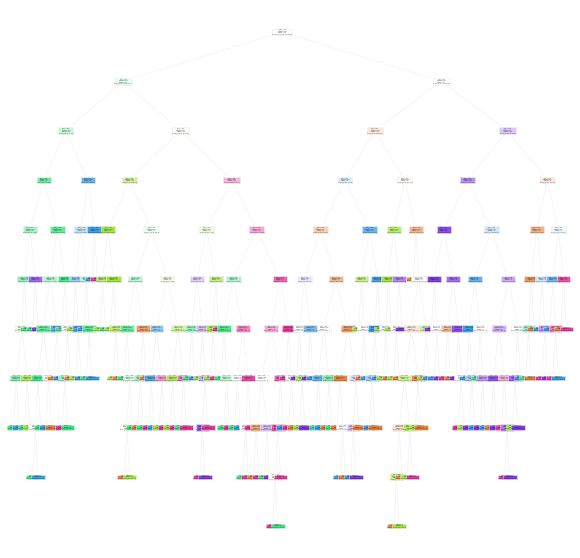

In [33]:
plt.figure(figsize=(10, 10))
plot_tree(dtc, filled=True)
plt.show()